<a href="https://colab.research.google.com/github/GurashishJuneja/MMAI831-Finance/blob/main/AI_In_Finance_Team_Assignment_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install quandl
import quandl
import scipy.optimize as sco
import yfinance as yf
from scipy.optimize import minimize

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Assignment Question #1-3


In [2]:
import importlib.util
package = 'quandl'
spec = importlib.util.find_spec(package)
if spec is None:
    print(package+" is not installed")
    !pip install --upgrade quandl

import quandl

# quandl.ApiConfig.api_key = 'PNzc8CxVBCyfmzjfFqaz'
quandl.ApiConfig.api_key = 'zRGencjq4Qa6FXk5AykE'

stocks = ['AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
df_quandl = quandl.get_table('WIKI/PRICES', ticker = stocks,
                   date = { 'gte': '1984-01-01', 'lte': '2022-12-31' }, paginate=True)
df_quandl.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,TSLA,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,TSLA,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,TSLA,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,TSLA,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,TSLA,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [3]:
spx=yf.download('^GSPC', start='1984-01-01',end='2022-12-31', interval='3mo' )
gdp=quandl.get('FRED/GDP',start_date='1984-01-01',end_date='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
data=spx.join(gdp).dropna()

In [5]:
data.drop(columns=['Open','High','Low','Close','Volume'], inplace=True)

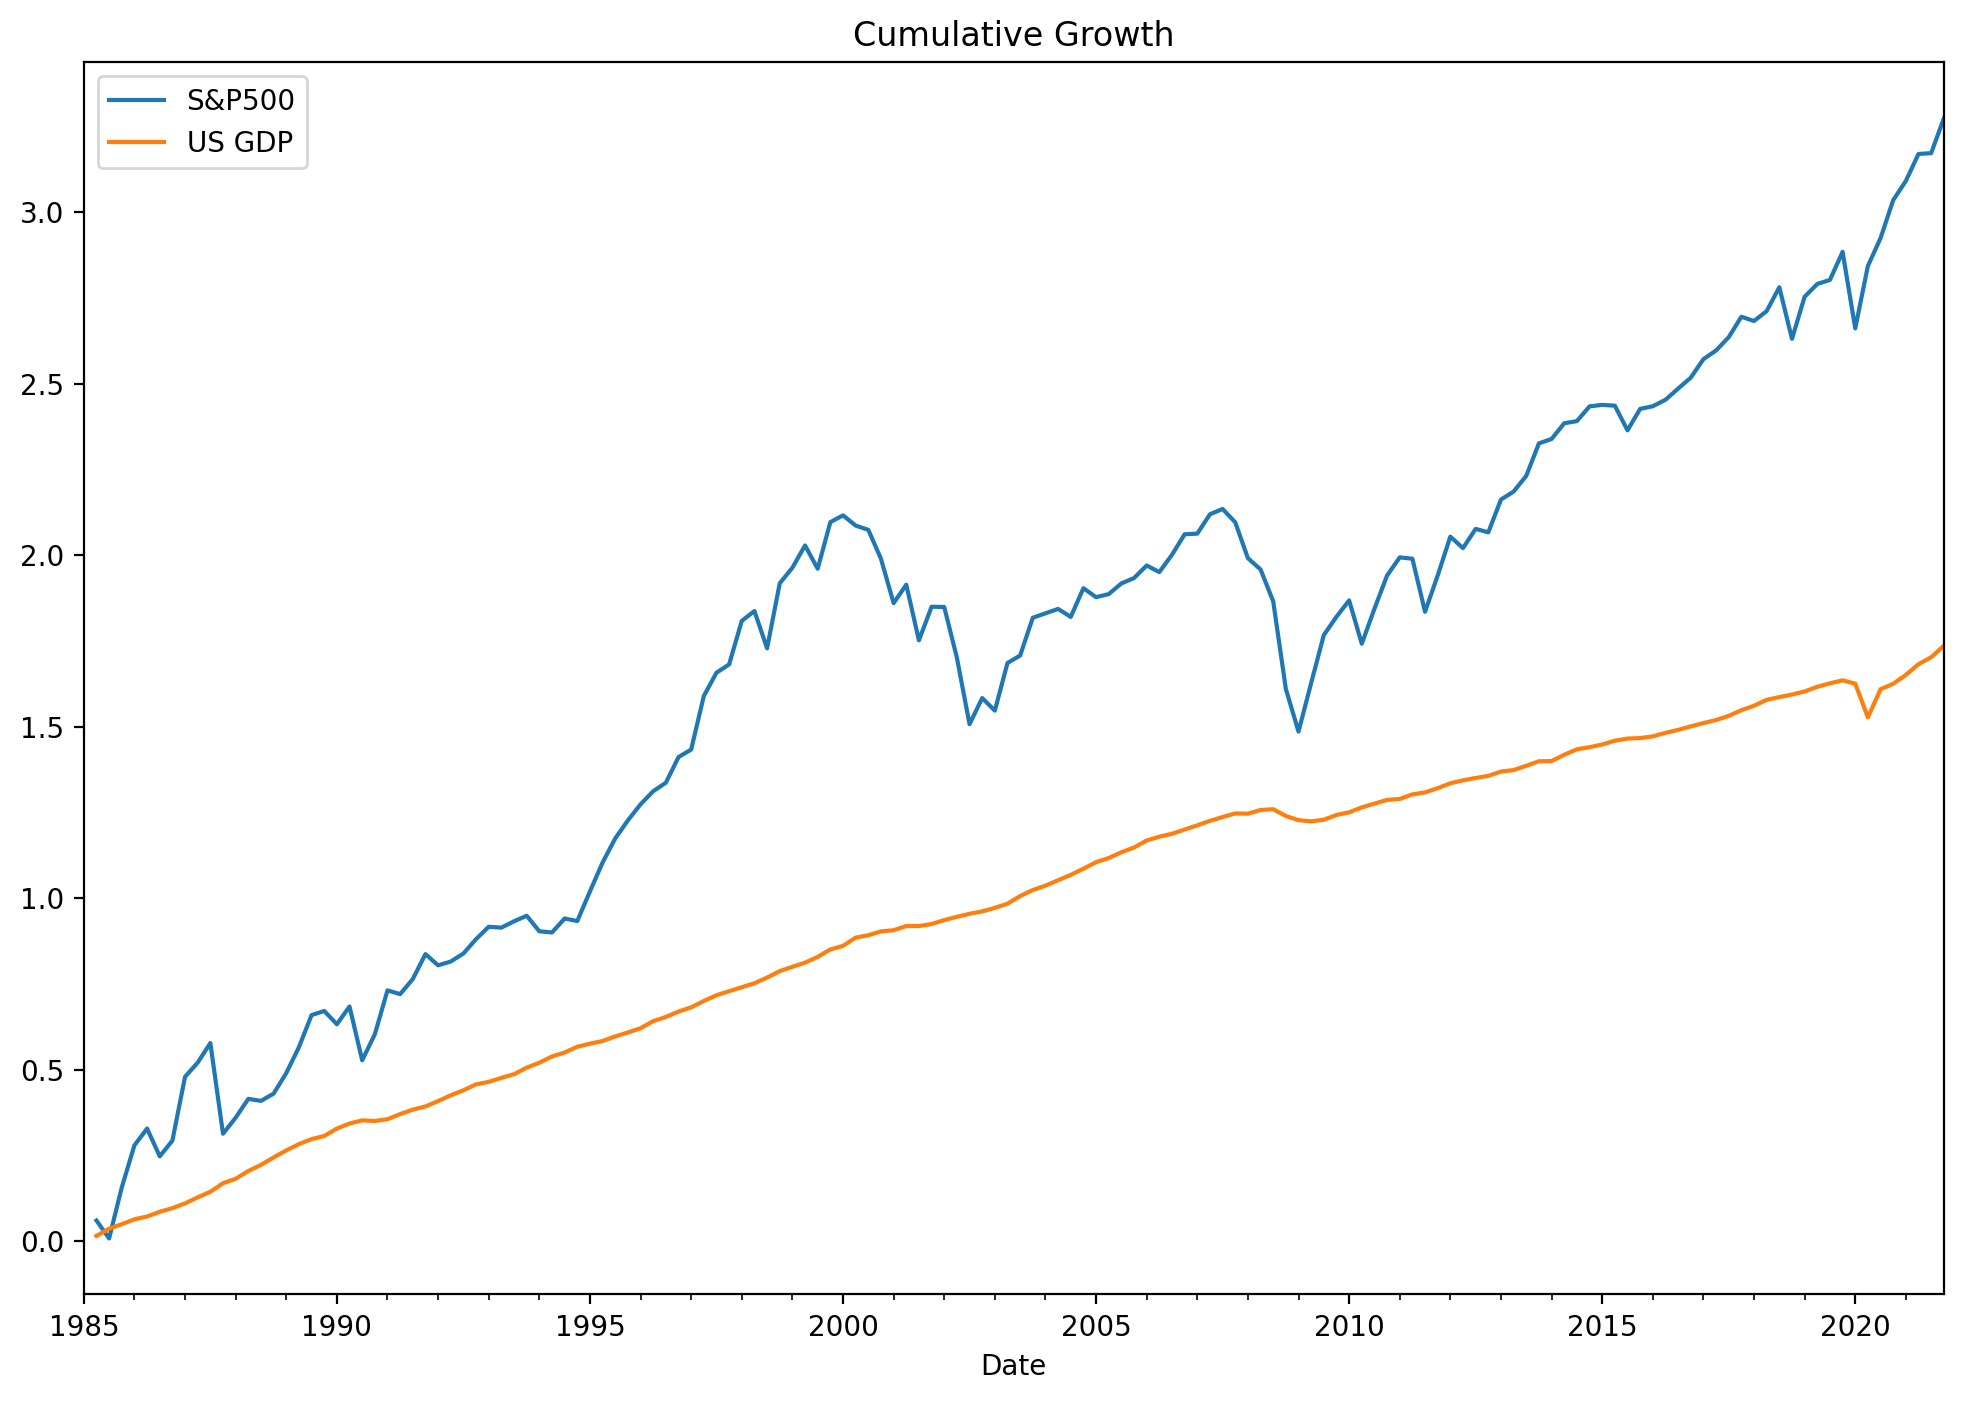

In [6]:
data.rename(columns={'Adj Close':'S&P500', 'Value':'US GDP'}, inplace=True)
growth=np.log(data/data.shift(1)).cumsum().plot(figsize=(12,8))
plt.title('Cumulative Growth')
plt.savefig('SP500+gdp.jpg')
plt.show()

## Assignment Question #1

a.	Explain what the lines represent.

b.	There are two big drops on SP 500. Briefly explain the causes for those drops. What about the third smaller one?

c.	From the graph, one can see that S&P 500 growth rate and US GDP growth rate started to diverge since the 1990s. From economic policy perspective, briefly discuss what might have caused the divergence. What do you think about the consequence of this divergence? 




## Assignement Question #2

List the S&P 500 companies that have the top 5 highest trailingPE, and the top 5 with highest forwardPE. Pick one of the companies in each case and explain if there was anything unusual about the company in the past year. Repeat the exercise for the 5 lowest ratios. 

In [7]:
# yf.Ticker('IBM').info

In [8]:
yf.Ticker('IBM').info['trailingPE']

56.066666

In [9]:
components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table

In [10]:
##Warning:  This takes a LONG time to run

SP500_PE=[]


for symbol in sp_df['Symbol']:
    try:
    #if symbol not in ['INFO', 'AES']:
        sym=symbol.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(sym)
        print(symbol,round(ticker_yahoo.info['forwardPE'],2))
        SP500_PE.append(
            {
                "Ticker":sym,
                "trainlingPE":ticker_yahoo.info['trailingPE'], 
                "forwardPE": ticker_yahoo.info['forwardPE'],
                "MarketCap": ticker_yahoo.info['marketCap']
            }
        )
    except:
        pass
    
SP500_PE=pd.DataFrame(SP500_PE)
    
    #    print(symbol,round(ticker_yahoo.info['forwardPE'],2))

MMM 11.25
AOS 18.69
ABT 23.48
ABBV 14.05
ACN 22.85
ATVI 18.23
ADM 11.01
ADBE 22.19
ADP 24.1
AAP 10.71
AES 10.86
AFL 10.99
A 20.53
APD 21.88
AKAM 13.89
ALK 6.35
ALB 9.84
ARE 30.93
ALGN 29.46
ALLE 15.52
LNT 17.09
ALL 9.17
GOOGL 19.56
GOOG 19.79
MO 8.58
AMZN 46.52
AMCR 13.81
AMD 26.52
AEE 17.77
AAL 4.76
AEP 15.42
AXP 13.32
AIG 7.12
AMT 38.99
AWK 27.74
AMP 9.11
ABC 13.73
AME 22.53
AMGN 11.9
APH 23.79
ADI 17.57
ANSS 31.74
AON 20.06
APA 5.25
AAPL 26.77
AMAT 19.13
APTV 15.75
ACGL 11.02
ANET 21.11
AJG 21.58
AIZ 9.61
T 6.65
ATO 18.11
ADSK 24.53
AZO 18.04
AVB 35.05
AVY 16.43
AXON 53.93
BKR 13.75
BALL 15.73
BAC 8.47
BBWI 10.79
BAX 12.92
BDX 18.46
WRB 10.28
BRK.B 18.43
BBY 10.45
BIO 23.75
TECH 34.55
BIIB 18.73
BLK 18.08
BK 7.93
BA 38.81
BKNG 18.43
BWA 7.68
BXP 23.39
BSX 24.07
BMY 8.74
AVGO 15.46
BR 20.5
BRO 23.84
BF.B 30.82
BG 7.85
CHRW 21.59
CDNS 37.91
CZR 20.28
CPT 60.42
CPB 16.78
COF 7.03
CAH 13.14
KMX 21.14
CCL 14.46
CARR 15.51
CTLT 12.86
CAT 11.82
CBOE 18.11
CBRE 13.27
CDW 16.77
CE 7.57
CNC 9

In [11]:
SP500_PE

,Ticker,trainlingPE,forwardPE,MarketCap
0,MMM,10.293388,11.246050,54968598528
1,AOS,43.484276,18.686485,10401559552
2,ABT,32.969604,23.478355,188623912960
3,ABBV,33.830193,14.048972,253069770752
4,ACN,26.447104,22.852148,181698871296
...,...,...,...,...
458,YUM,32.57647,23.426395,38778044416
459,ZBRA,35.313526,15.364685,14366024704
460,ZBH,63.093456,16.983648,28326926336
461,ZION,4.65641,5.309941,4034270976


In [12]:
SP500_PE.to_csv('sp500company_pe_2022.csv')

In [13]:
SP500_PE['trainlingPE'] = pd.to_numeric(SP500_PE['trainlingPE'], errors='coerce')
SP500_PE_sorted_tr = SP500_PE.sort_values('trainlingPE', ascending=False)
SP500_PE_sorted_tr[['Ticker','trainlingPE']].head(6)

,Ticker,trainlingPE
237,PODD,inf
101,CINF,5286.50050
381,CRM,1015.80960
186,FSLR,573.00000
25,AMD,513.95240
450,WELL,295.69232


In [14]:
SP500_PE['forwardPE'] = pd.to_numeric(SP500_PE['forwardPE'], errors='coerce')
SP500_PE_sorted_fo = SP500_PE.sort_values('forwardPE', ascending=False)
SP500_PE_sorted_fo[['Ticker','forwardPE']].head(6)

,Ticker,forwardPE
237,PODD,142.86322
297,MU,107.25397
135,DXCM,79.35333
167,EQIX,67.58950
450,WELL,66.85217
137,DLR,62.80000


Company: CINF (Cincinnati Financial Corp.)

Ticker: CINF

Trainling PE: 5189.00000

Cincinnati Financial Corp. (CINF) has a trailing PE ratio of 5189.00000. A high PE ratio typically indicates that investors are willing to pay a premium for the company's earnings. In this case, the extremely high PE ratio for CINF suggests that its stock price is significantly higher relative to its earnings. However, it's important to note that a single metric, such as the PE ratio, may not provide a complete understanding of a company's financial situation.

To determine if anything unusual has occurred with CINF in the past year, it would be helpful to conduct a more thorough analysis, including reviewing the company's financial reports, news releases, and market developments. This information can provide insights into factors that may have contributed to the high trailing PE ratio and whether it is indicative of any unusual events or circumstances affecting the company.

Please keep in mind that this analysis is based solely on the available data and general understanding of PE ratios. For a comprehensive evaluation of a company's performance and any unusual occurrences, it is recommended to consult authoritative sources and conduct in-depth research.



Company: MU (Micron Technology Inc.)

Ticker: MU

Forward PE: 97.74603

Micron Technology Inc. (MU) has a forward PE ratio of 97.74603. The forward PE ratio is calculated based on estimated future earnings. A high forward PE ratio suggests that the market has high expectations for the company's future earnings growth.

To determine if there is anything unusual about MU in the past year, we need to consider various factors, such as the company's financial performance, industry trends, and recent news or events. Some points to consider for MU could include:

Market Conditions: Micron Technology operates in the semiconductor industry, which has experienced significant demand and supply dynamics. Changes in demand for memory chips, shifts in technology, or geopolitical factors could have influenced the company's performance. Financial Performance: Analyzing Micron Technology's financial statements, including revenue, profitability, and earnings growth, can provide insights into the company's recent performance. Comparing the forward PE ratio with historical values or industry benchmarks can help identify any significant deviations. Industry Developments: Understanding the broader semiconductor industry landscape, such as advancements in technology, competition, or regulatory changes, can provide context for assessing MU's performance relative to its peers. It's important to note that this analysis is based on the available data and general knowledge of PE ratios and industry trends. To obtain a comprehensive understanding of any unusual occurrences or factors affecting MU, further research and analysis, including reviewing the company's financial reports and staying updated with relevant news, would be necessary.

In [15]:
SP500_PE_sorted_tr[['Ticker','trainlingPE']].tail(6)

,Ticker,trainlingPE
113,CMA,4.087460
345,PSX,3.677616
279,MPC,3.529898
165,EQT,3.225919
434,VLO,3.176253
139,DISH,1.906849


In [16]:
SP500_PE_sorted_fo[['Ticker','forwardPE']].tail(6)

,Ticker,forwardPE
27,AAL,4.762658
429,UAL,4.498131
332,OGN,4.479212
440,VTRS,3.253472
300,MRNA,-33.421333
139,DISH,-69.600000


Company: DISH Network Corporation

Ticker: DISH

Trailing PE: 2.030449

DISH Network Corporation (DISH) has a trailing PE ratio of 2.030449. A low PE ratio typically suggests that the market is valuing the company's earnings relatively lower compared to its stock price. It indicates that investors are willing to pay less for each unit of earnings generated by the company.

To understand why the trailing PE ratio for DISH is lower, we need to consider several factors:

Industry Dynamics: DISH operates in the telecommunications and media industry. It is possible that the company is facing challenges or undergoing changes within its industry that are impacting its earnings and, subsequently, its PE ratio. Competitive pressures, technological advancements, or shifts in consumer behavior could contribute to the lower PE ratio.

Financial Performance: Analyzing DISH's financial statements, such as revenue, profitability, and earnings growth, can provide insights into the company's recent performance. If the company has experienced a decline in earnings or faces challenges in generating consistent profits, it could contribute to a lower PE ratio.

Market Sentiment: The market's perception of DISH's prospects and future growth potential can influence its PE ratio. If investors have concerns or uncertainties about the company's future earnings or strategic direction, it could result in a lower valuation.

It's important to note that this analysis is based on the available data and general knowledge of PE ratios and industry trends. To obtain a comprehensive understanding of any unusual occurrences or factors impacting DISH, further research and analysis, including reviewing the company's financial reports and staying updated with relevant news and industry developments, would be necessary.

Company: Moderna Inc.

Ticker: MRNA

Forward PE: -31.189188

Moderna Inc. (MRNA) has a forward PE ratio of -31.189188. A negative PE ratio indicates that the company is expected to report negative earnings in the future, based on the estimated forward earnings. This situation can occur when a company is in a growth phase and reinvesting heavily in research and development or experiencing losses in the short term.

To understand why Moderna's forward PE ratio is negative, we need to consider several factors:

Biotechnology Industry: Moderna operates in the biotechnology sector, particularly focused on mRNA-based drug development, including vaccines. The industry is known for high research and development costs, which can impact earnings and contribute to negative PE ratios in the short term.

Vaccine Development: Moderna gained significant attention for its COVID-19 vaccine development. The negative forward PE ratio may be influenced by the company's substantial investment in research and development, ongoing clinical trials, and uncertainties related to the commercial success and profitability of their vaccines beyond the pandemic period.

Market Expectations: The negative forward PE ratio could reflect the market's perception that Moderna's future earnings may not meet expectations or that there is uncertainty regarding the company's future profitability. Factors such as competition, regulatory challenges, or the ability to maintain a sustainable pipeline of successful products could influence market sentiment.

It's crucial to note that this analysis is based on the available data and general understanding of PE ratios and the biotechnology industry. To gain a comprehensive understanding of any unusual occurrences or factors impacting Moderna, further research, including reviewing the company's financial reports, clinical trial results, and staying updated with relevant news and developments in the industry, is recommended.

Company: American Airlines Group Inc.

Ticker: AAL

Forward PE: 4.493650

American Airlines Group Inc. (AAL) has a forward PE ratio of 4.493650. A low forward PE ratio suggests that the market is valuing the company's future earnings relatively lower compared to its stock price. It indicates that investors are willing to pay less for each unit of expected earnings generated by the company.

To understand if there is anything unusual about American Airlines in the context of its forward PE ratio, we need to consider several factors:

Airline Industry Dynamics: The airline industry has faced significant challenges, especially due to the COVID-19 pandemic. Airlines experienced a severe downturn in demand, travel restrictions, and increased costs. These factors can impact earnings and subsequently influence the PE ratio. It is important to consider the industry's recovery prospects and the potential impact on American Airlines' future earnings.

Financial Performance: Analyzing American Airlines' financial reports, such as revenue, profitability, and cost management, can provide insights into the company's recent performance. Factors such as operating efficiency, pricing power, and market share can influence the company's ability to generate earnings and impact the PE ratio.

Market Sentiment: The market's perception of American Airlines' future growth potential, competitive position, and recovery outlook can influence its forward PE ratio. Factors such as changes in travel demand, competitive dynamics within the industry, and investor sentiment towards the airline sector can affect the company's valuation.

It's important to note that this analysis is based on the available data and general knowledge of PE ratios and the airline industry. To gain a comprehensive understanding of any unusual occurrences or factors impacting American Airlines, further research, including reviewing the company's financial reports, staying updated with relevant news, and monitoring the industry's recovery progress, would be necessary.

# Assignment Question #3
Suppose that you want to establish a portfolio among only those S&P 500 companies with the following features:

1.   Market cap between the 40-60% quantile
2.   Forward PE among the 30-50% quantile.
	
List those companies.


In [17]:
# Calculate the quantiles for market cap and forward PE
market_cap_quantile_40 = SP500_PE['MarketCap'].quantile(0.4)
market_cap_quantile_60 = SP500_PE['MarketCap'].quantile(0.6)

forward_pe_quantile_30 = SP500_PE['forwardPE'].quantile(0.3)
forward_pe_quantile_50 = SP500_PE['forwardPE'].quantile(0.5)

# Filter the DataFrame based on the given quantile ranges
filtered_portfolio = SP500_PE[
    (SP500_PE['MarketCap'] >= market_cap_quantile_40) & (SP500_PE['MarketCap'] <= market_cap_quantile_60) &
    (SP500_PE['forwardPE'] >= forward_pe_quantile_30) & (SP500_PE['forwardPE'] <= forward_pe_quantile_50)
]

# Display the list of companies in the filtered portfolio
portfolio_companies = filtered_portfolio[['Ticker', 'MarketCap', 'forwardPE']]
print(portfolio_companies)

    Ticker    MarketCap  forwardPE
34     ABC  35358744576  13.732916
44    APTV  25652082688  15.752492
83    CARR  36123443200  15.508961
87    CBRE  23875004416  13.265976
110   CTSH  32285685760  13.594017
119    GLW  26600568832  12.983402
120   CTVA  39943954432  16.100286
149     DD  30703646720  13.540485
155    EIX  26368378880  13.553149
173     ES  26481262592  15.798285
174    EXC  39176073216  15.756000
245    IQV  36265549824  16.341972
254      K  23667441664  16.020882
260    KMI  37137289216  13.882353
264    LHX  35207942144  14.004520
329     ON  37352693760  16.016666
357    PEG  30641440768  16.597298
388    SPG  39504044032  15.799401
402    SYY  37151539200  16.337053
404   TROW  24184158208  15.428367
408    TEL  38787506176  16.390146
441   VICI  31503009792  12.399210
453    WMB  35583328256  16.410112
454    WTW  24208957440  13.374485


# Assignment Question #4

Use the same companies we picked in the Session - 2 Frontier Analysis example, and the same time period (2017-2022). Assume risk free rate was 2.78% (constant for this question).

a.	One the first business day of January, 2022, use the data from 2017-2021 to find the portfolio that has the highest Sharpe ratio (tangent portfolio).  You can use the monthly returns.

b.	Use the data from 2022, compute the mean and standard deviation of the monthly returns for the equally weighted portfolio (rebalanced at the beginning of each month).

c.	Compute the mean and standard deviation for the monthly returns of the tangent portfolio.

d.	Compare the results.

**Note: Make sure the returns are all consistent, i.e., convert them all to daily, monthly, or annual returns.  Make up assumptions as needed.**

## Initial setup

In [18]:

# Define the stock symbols
stocks = ['AAPL', 'AMZN', 'GOOGL', 'BAC', 'MCD', 'CAT', 'TSLA', 'PFE']

# Create an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through each stock symbol and retrieve the data
for stock in stocks:
    # Retrieve the daily stock data for the year 2022
    stock_data = yf.download(stock, start='2017-01-01', end='2022-12-31')
       
    # Add a column for the stock symbol
    stock_data.loc[:, 'ticker'] = stock
    
    # Append the stock data to the main DataFrame
    data = pd.concat([data, stock_data], axis=0)

# Reset the index of the DataFrame
data.reset_index(inplace=True)

# Select the desired columns
data = data[['Date', 'ticker', 'Adj Close']]

# Rename the columns to match the original code
data.columns = ['date', 'ticker', 'adj_close']

# Print the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        date ticker  adj_close
0 2017-01-03   AAPL  27.095850
1 2017-01-04   AAPL  27.065527
2 2017-01-05   AAPL  27.203156
3 2017-01-06   AAPL  27.506426
4 2017-01-09   AAPL  27.758369


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       12080 non-null  datetime64[ns]
 1   ticker     12080 non-null  object        
 2   adj_close  12080 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 283.2+ KB


In [20]:
# Check if all the companies and time period are correctly selected  
print('The companies are:', data.ticker.unique(), 'and there is', len(data),'date entry points')
print('The date range of stock data is from', data.date.min(), ' to ',data.date.max())

The companies are: ['AAPL' 'AMZN' 'GOOGL' 'BAC' 'MCD' 'CAT' 'TSLA' 'PFE'] and there is 12080 date entry points
The date range of stock data is from 2017-01-03 00:00:00  to  2022-12-30 00:00:00


In [21]:
# keep this 'data' as original and use df. We drop the level(0), which is the adj_closed written on th first line, no need for it
df = data.set_index('date')
table = df.pivot(columns='ticker')
table.columns = table.columns.droplevel(0)
table.head()

ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
date,,,,,,,,
2017-01-03,27.095850,37.683498,19.755682,79.812828,40.400501,103.010803,24.618332,14.466000
2017-01-04,27.065527,37.859001,20.123966,79.456192,40.388500,102.890221,24.834671,15.132667
2017-01-05,27.203156,39.022499,19.887213,78.972168,40.651001,103.079666,25.073399,15.116667
2017-01-06,27.506426,39.799500,19.887213,79.006111,41.260502,103.992500,24.976418,15.267333
2017-01-09,27.758369,39.846001,19.773224,78.437180,41.359001,103.708313,24.968956,15.418667


Text(0, 0.5, 'price in $')

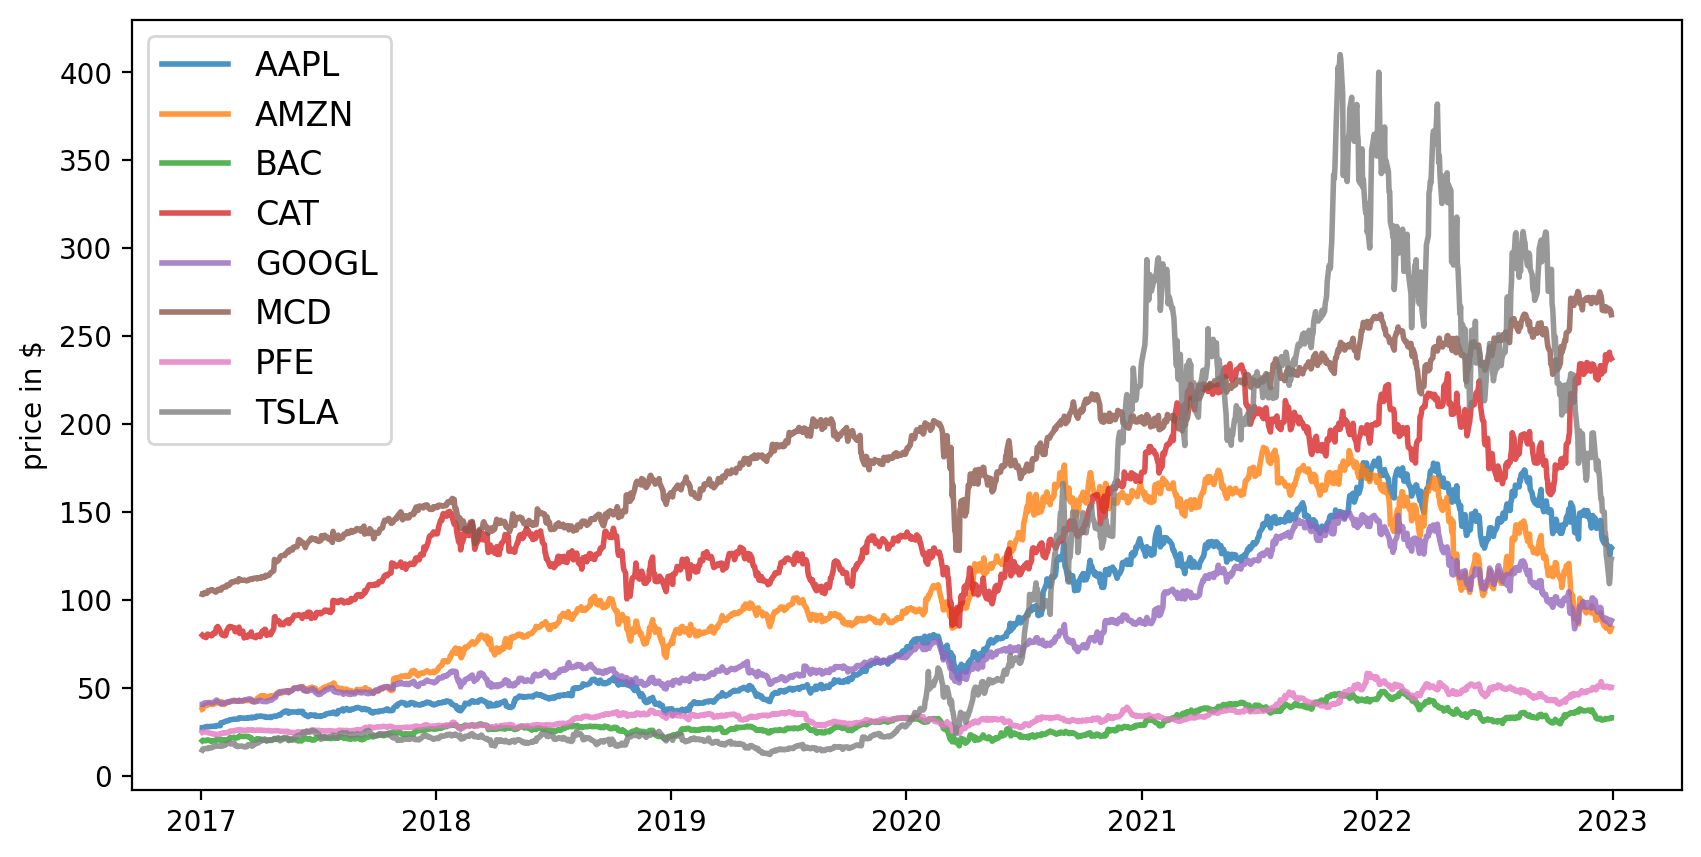

In [22]:
plt.figure(figsize=(10, 5))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=2, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

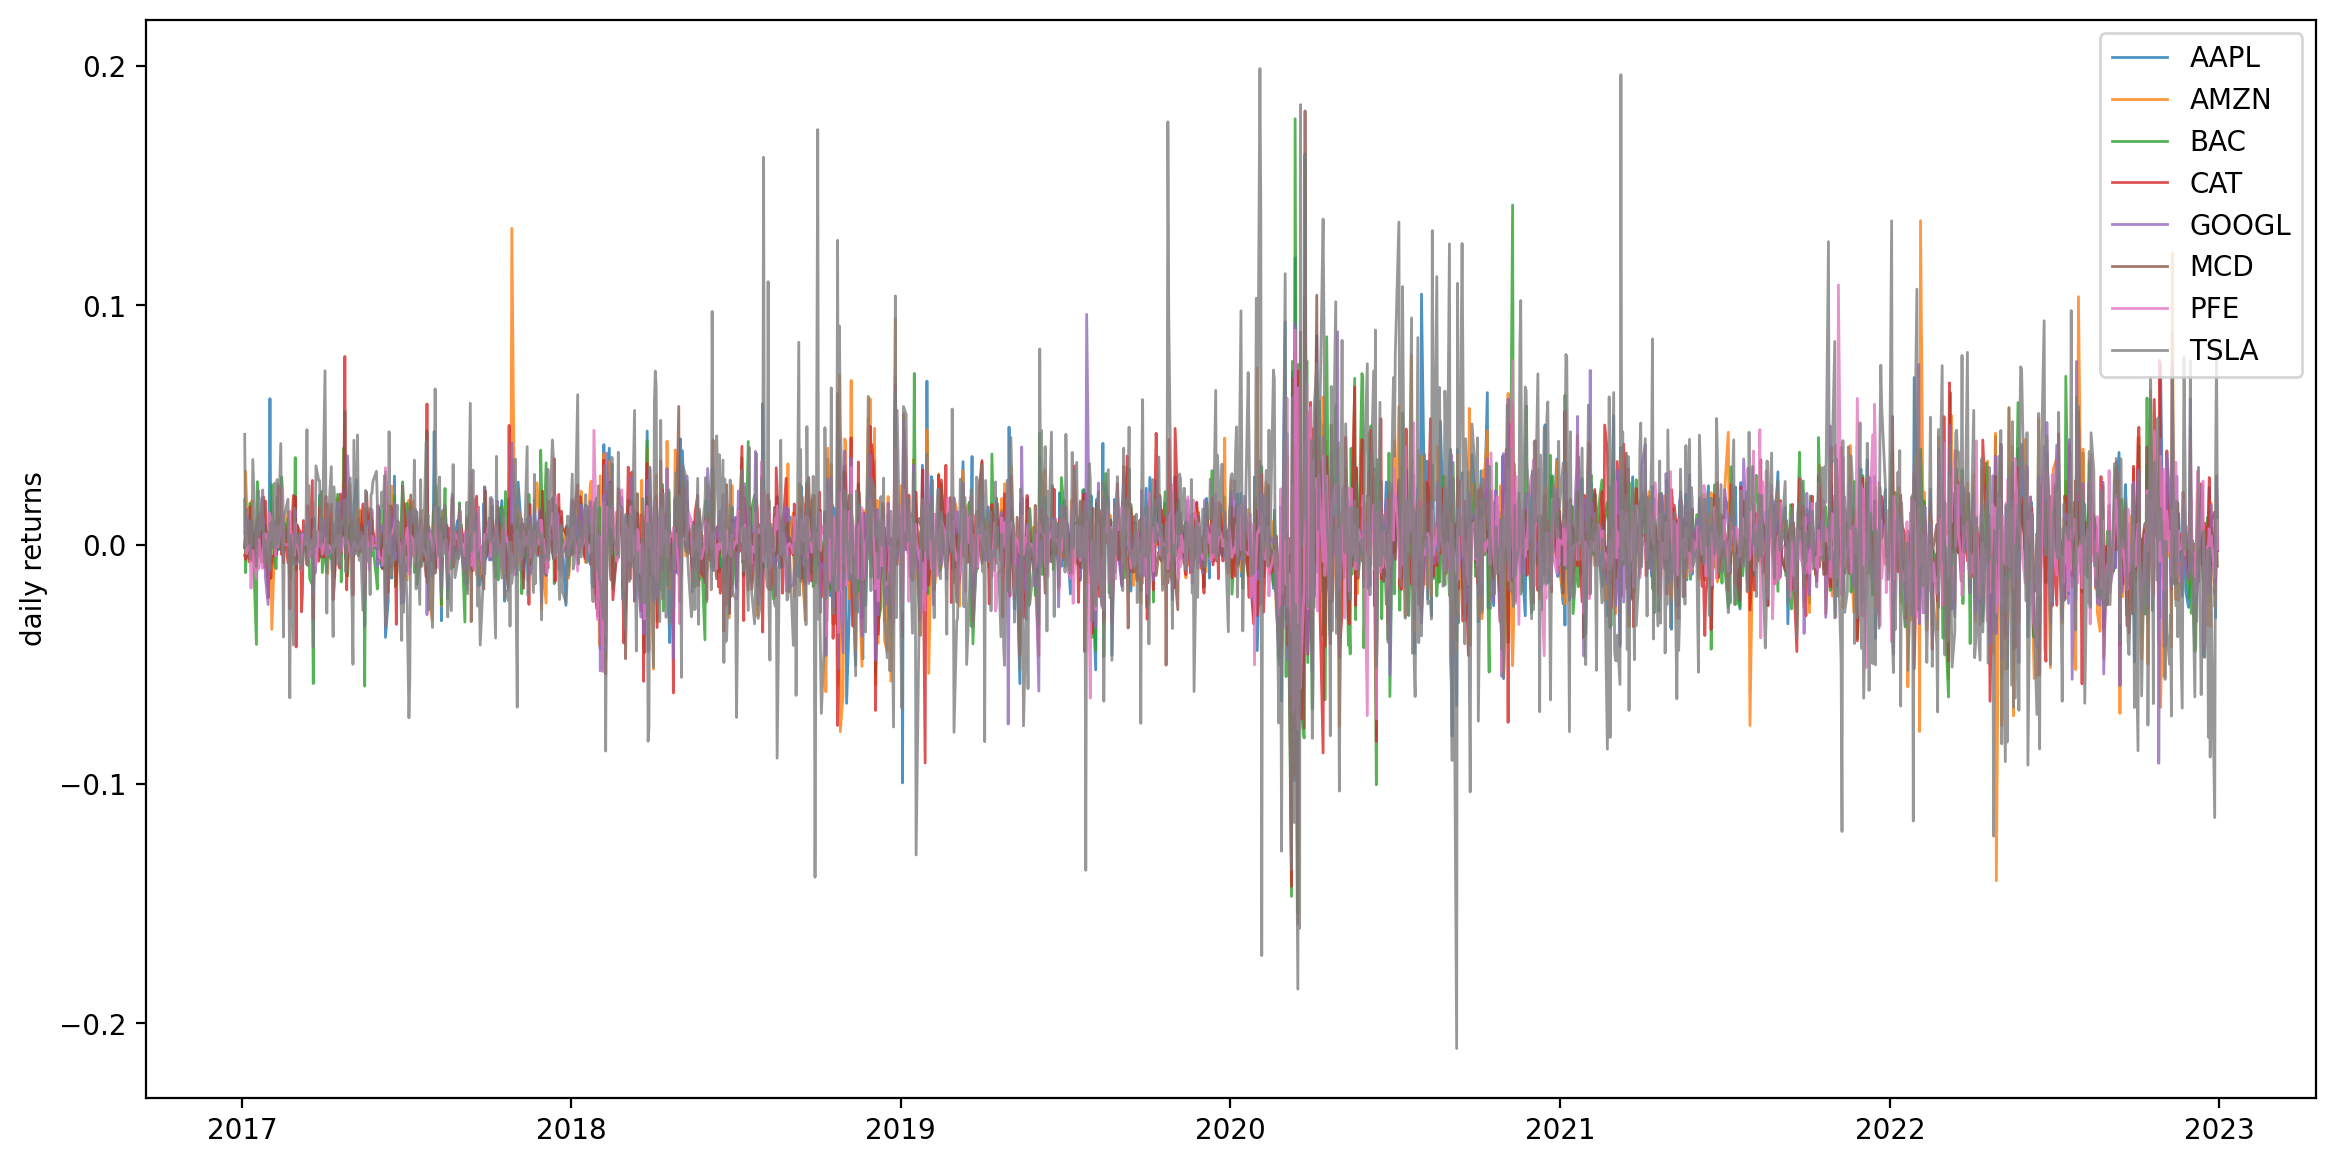

In [23]:
# Calculate the daily percentage returns of the table and then plot the daily returns for each column
# Need daily returns for corelation analysis
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=1, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('daily returns')

In [50]:
#Estimate the imputs needed for the MV Analysis
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 2500 # number of random portfolios
risk_free_rate = 0.0278

## a. On the first business day of January, 2022, use the data from 2017-2021 to find the portfolio that has the highest Sharpe ratio (tangent portfolio). You can use the monthly returns.

In [51]:
returns = table.pct_change().dropna()
returns

ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
date,,,,,,,,
2017-01-04,-0.001119,0.004657,0.018642,-0.004468,-0.000297,-0.001171,0.008788,0.046085
2017-01-05,0.005085,0.030732,-0.011765,-0.006092,0.006499,0.001841,0.009613,-0.001057
2017-01-06,0.011148,0.019912,0.000000,0.000430,0.014994,0.008856,-0.003868,0.009967
2017-01-09,0.009159,0.001168,-0.005732,-0.007201,0.002387,-0.002733,-0.000299,0.009912
2017-01-10,0.001009,-0.001280,0.017295,0.015806,-0.001414,-0.001494,-0.000896,-0.006096
...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.017425,0.002470,0.009809,0.016750,0.006773,0.003679,-0.017551
2022-12-27,-0.013878,-0.025924,0.001848,0.013632,-0.020621,-0.002728,-0.013506,-0.114089
2022-12-28,-0.030685,-0.014692,0.007378,-0.015464,-0.015677,-0.006483,-0.006454,0.033089


### a.1. Random Portfolio Generation

In [52]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights) * 12  # Multiply by 12 for annualization
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(12)  # Multiply by sqrt(12) for annualization
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)  #make sure the sum is 1
        weights_record.append(weights)
        portfolio_std, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std
    return results, weights_record

In [53]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    # # Normalize allocations to ensure they sum up to 1
    # max_sharpe_allocation = max_sharpe_allocation.div(max_sharpe_allocation.sum(axis=1), axis=0)
    # min_vol_allocation = min_vol_allocation.div(min_vol_allocation.sum(axis=1), axis=0)
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp,2))
    print("Annualized STD:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum STD Portfolio Allocation\n")
    print("Annualized Return:", round(rp_min,2))
    print("Annualized STD:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='o',color='r',s=50, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='o',color='g',s=50, label='Minimum STD')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized STD')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.27
Annualized STD: 0.23


ticker       AAPL  AMZN   BAC    CAT  GOOGL    MCD    PFE   TSLA
allocation  20.55  0.82  3.44  19.33   2.93  17.49  18.51  16.94
--------------------------------------------------------------------------------
Minimum STD Portfolio Allocation

Annualized Return: 0.19
Annualized STD: 0.17


ticker      AAPL  AMZN   BAC   CAT  GOOGL    MCD    PFE  TSLA
allocation  6.37  9.59  2.82  12.7  19.33  35.12  12.91  1.15


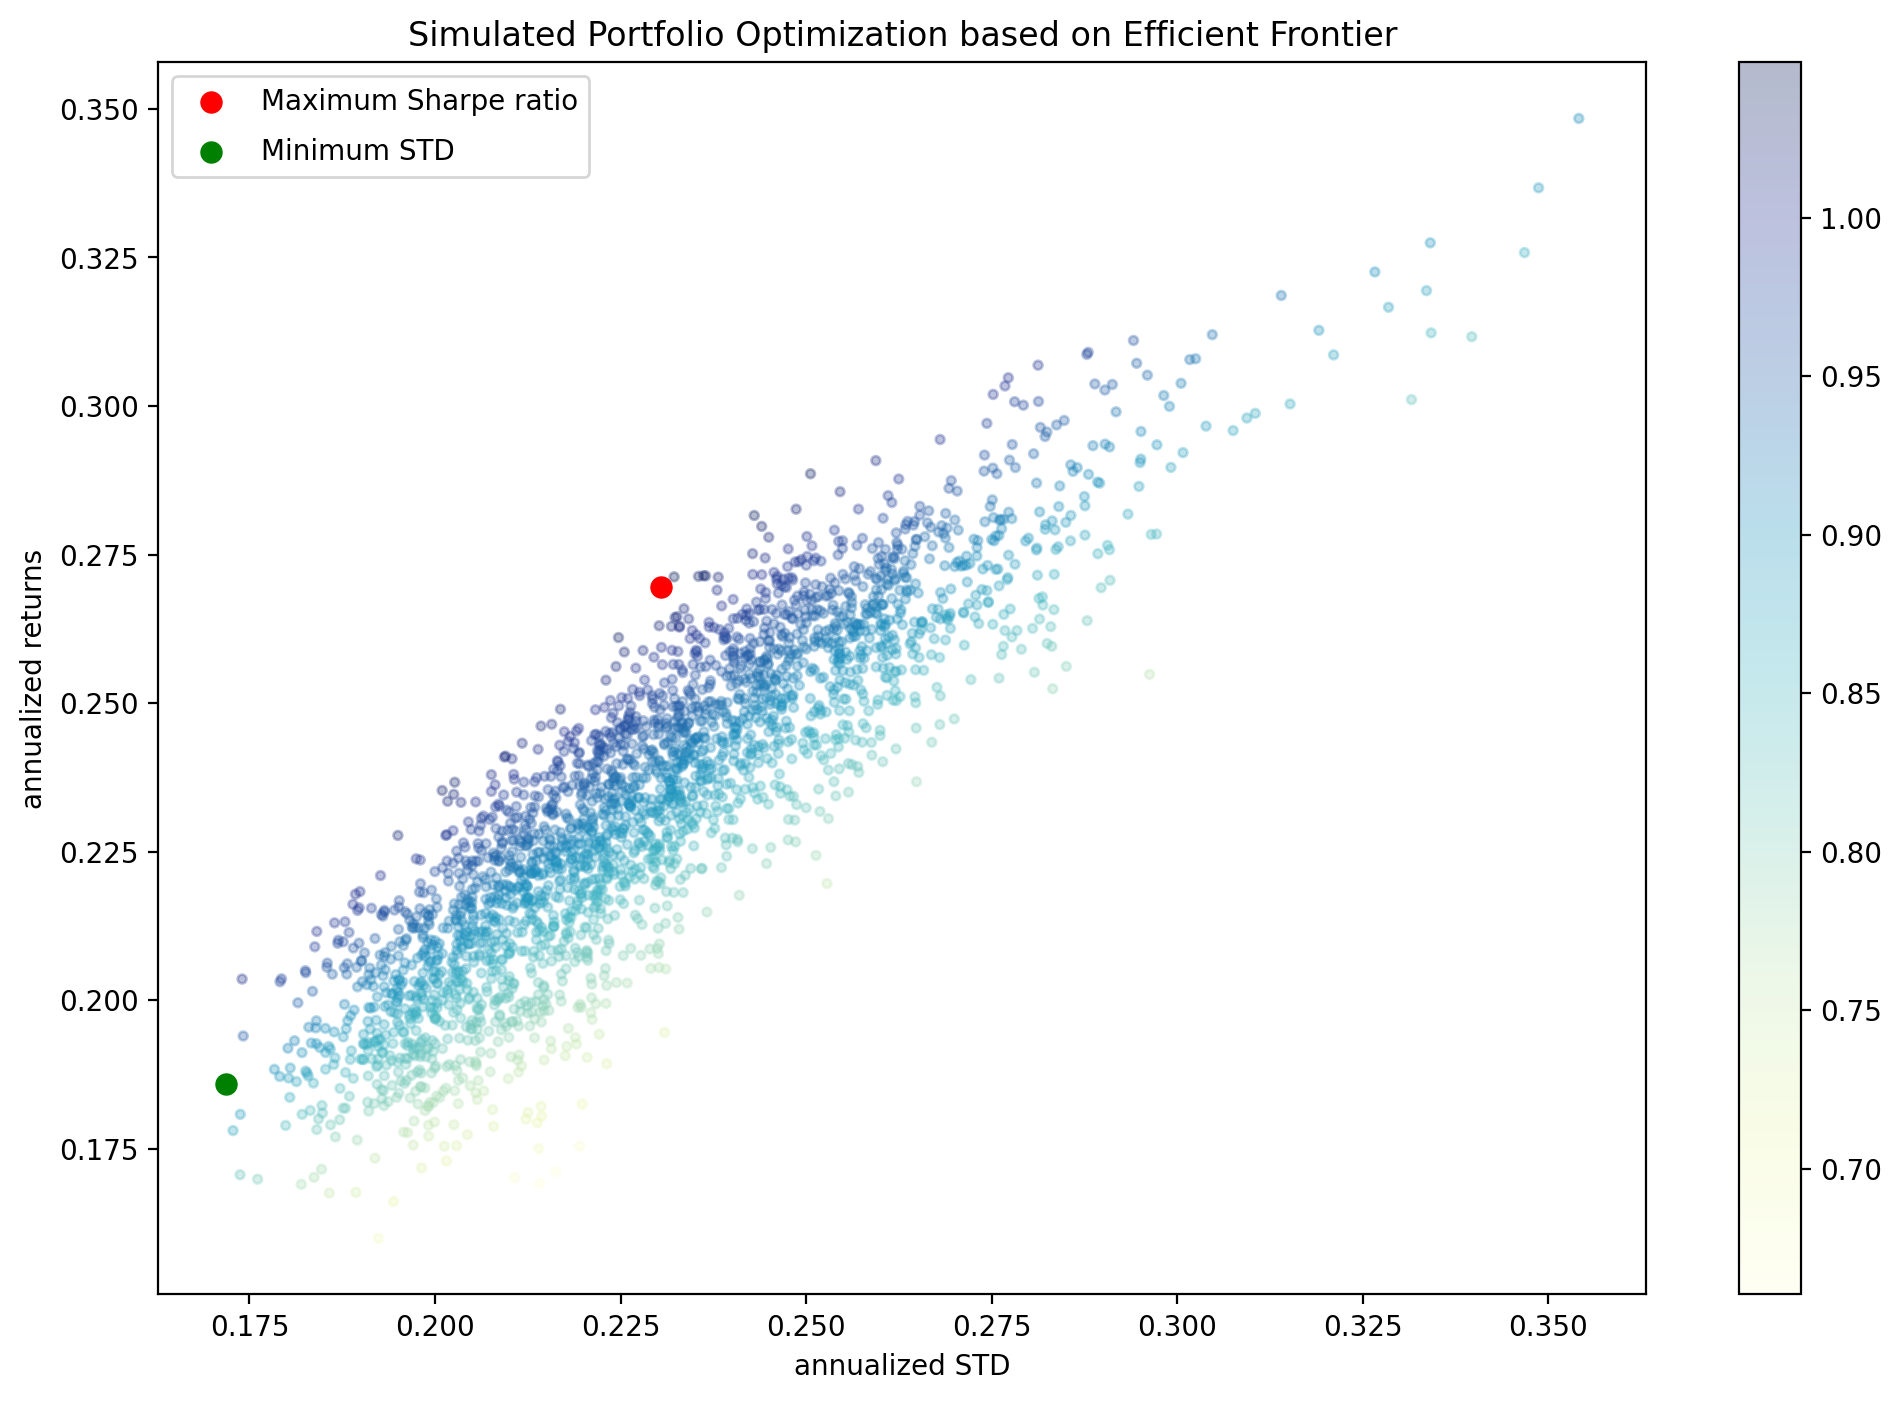

In [54]:
monthly_returns = table.resample('M').last().pct_change().dropna()

returns = monthly_returns
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)


### a.2. Efficient Portfolio, tangent

In [55]:
#Equality constraint: sum of weight =1, or np.sum(x)-1=0
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

#we want to maximize the sharpe ratio, but the minimizing routine is foe min
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints) #sequential least squares programming algorithm
    return result

In [56]:
def portfolio_std(weights, mean_returns, cov_matrix):
    return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[0]

def min_std(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [57]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_std, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [58]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualized_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_std(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualized_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp,2))
    print("Annualized STD:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print( "Minimum STD Portfolio Allocation\n")
    print("Annualized Return:", round(rp_min,2))
    print("Annualized STD:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    plt.figure(figsize=(12, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='o',color='r',s=50, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='o',color='g',s=50, label='Minimum STD')
    
    x0=[0,sdp]
    y0=[risk_free_rate, rp]
   # print("tp", sdp, rp)
    plt.plot(x0,y0)
    
    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized STD')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.25
Annualized STD: 0.21


ticker       AAPL  AMZN  BAC    CAT  GOOGL    MCD    PFE  TSLA
allocation  26.06   0.0  0.0  20.98    0.0  33.01  10.35  9.59
--------------------------------------------------------------------------------
Minimum STD Portfolio Allocation

Annualized Return: 0.17
Annualized STD: 0.16


ticker      AAPL  AMZN  BAC   CAT  GOOGL    MCD    PFE  TSLA
allocation   0.0  2.91  0.0  5.27   17.8  53.18  20.85   0.0


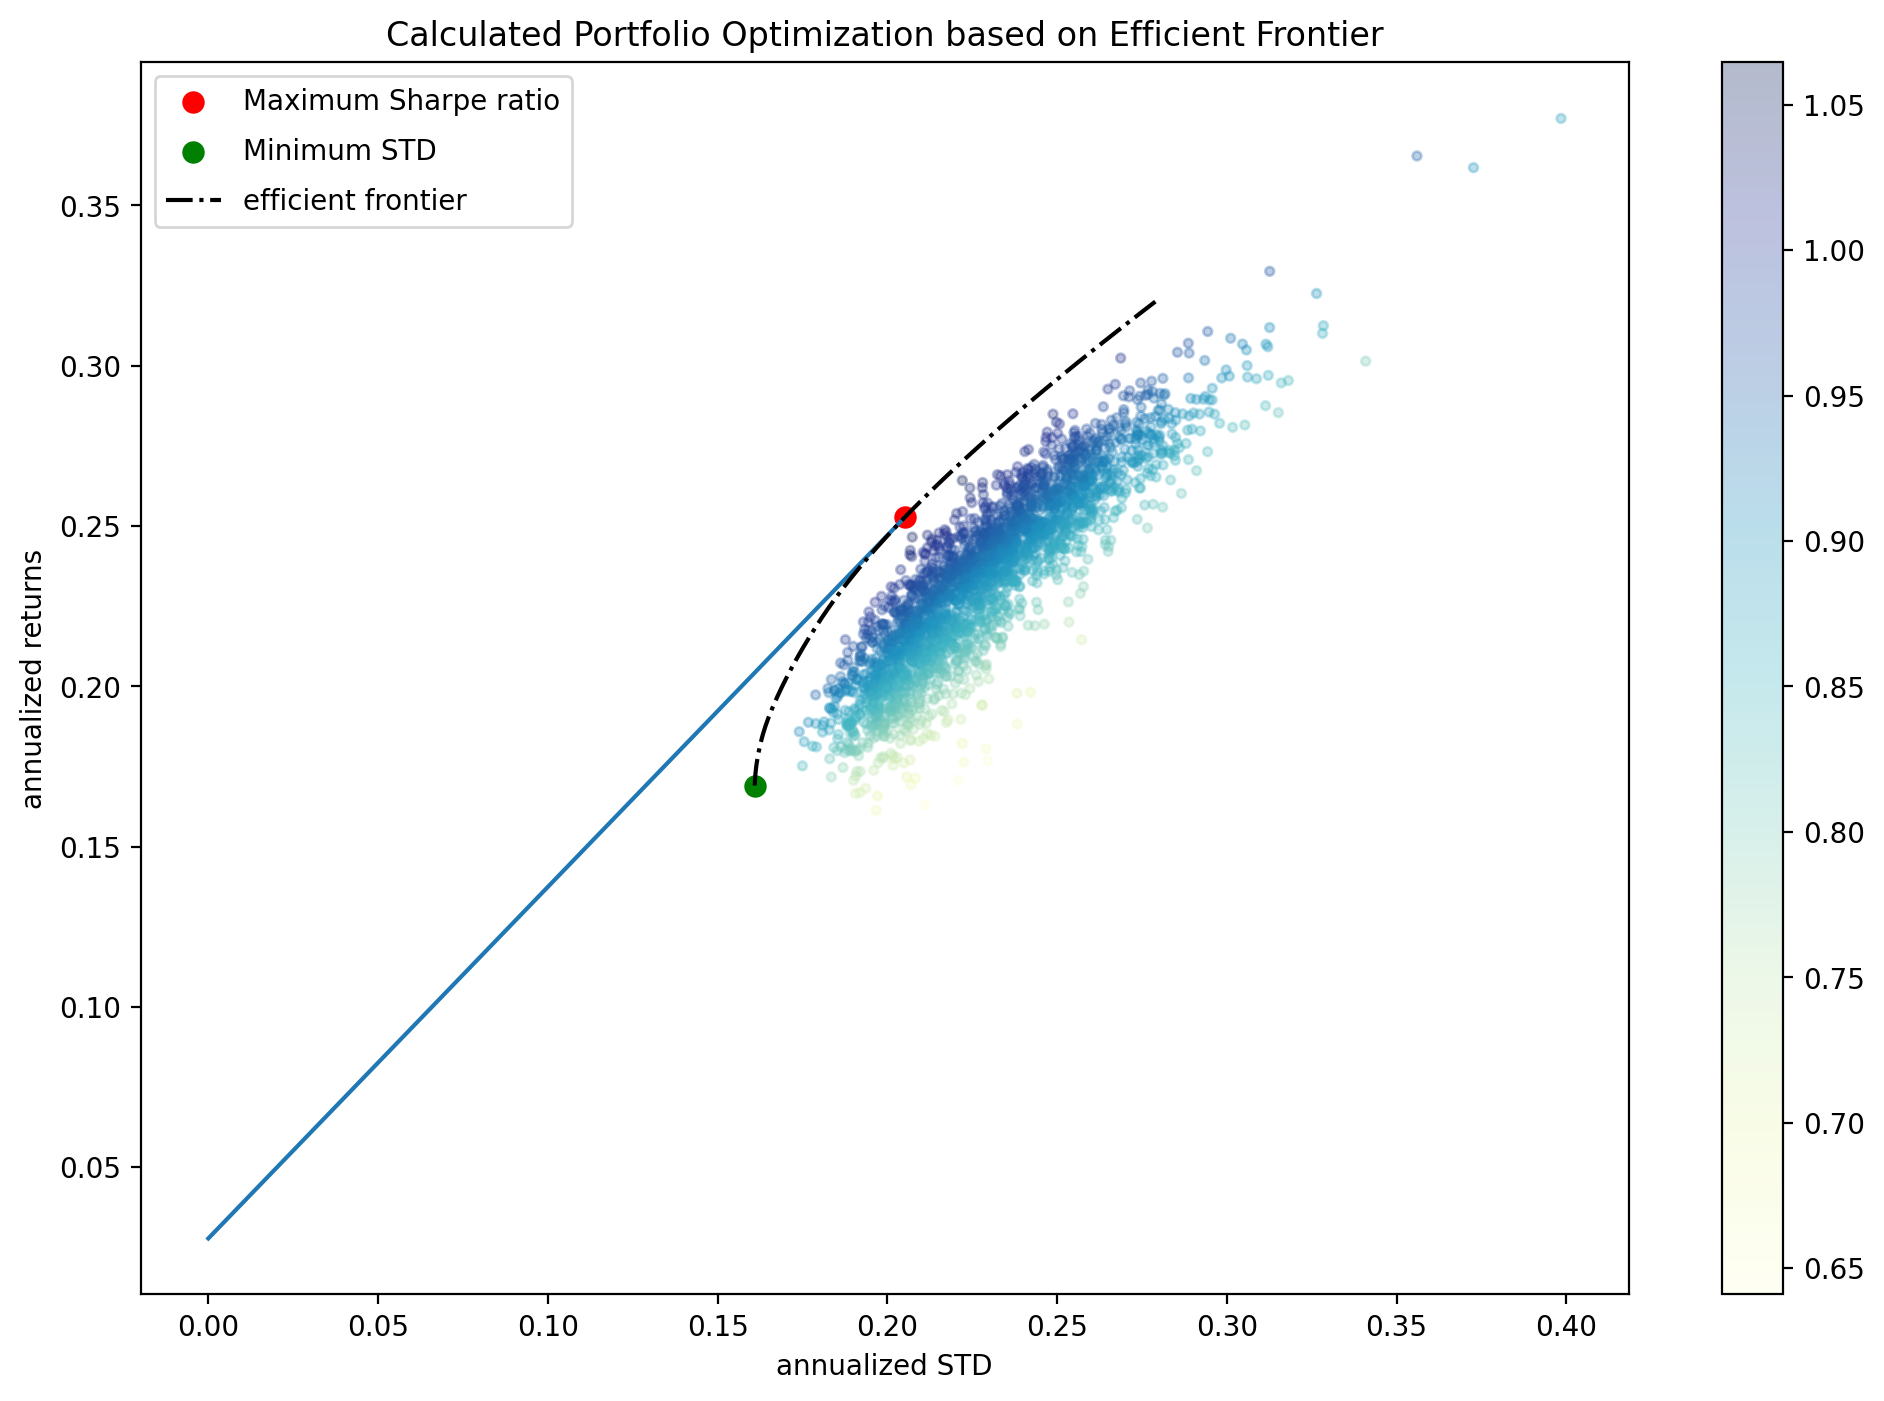

In [59]:
# display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

monthly_returns = table.resample('M').last().pct_change().dropna()

returns = monthly_returns
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

## b. Use the data from 2022, compute the mean and standard deviation of the monthly returns for the equally weighted portfolio (rebalanced at the beginning of each month).

In [136]:
# Select the data for the year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'
returns_2022 = returns.loc[start_date:end_date]

# Compute the monthly returns for each asset
monthly_returns_2022 = returns_2022.resample('M').mean()

# Compute the equally weighted portfolio returns
equally_weighted_returns_2022 = monthly_returns_2022.mean()

# Calculate the weights of the equally weighted portfolio
num_assets = len(monthly_returns_2022.columns)
weights = np.ones(num_assets) / num_assets

# Calculate the mean and standard deviation of the equally weighted portfolio returns
portfolio_mean_return = equally_weighted_returns_2022.mean()
portfolio_std_dev = equally_weighted_returns_2022.std()

# Print the results
print("Mean of equally weighted portfolio returns (2022):", portfolio_mean_return)
print("Standard deviation of equally weighted portfolio returns (2022):", portfolio_std_dev)
print("Asset allocation:")
for i, asset in enumerate(monthly_returns_2022.columns):
    print(asset + ": " + str(weights[i]))



Mean of equally weighted portfolio returns (2022): -0.021772751200983854
Standard deviation of equally weighted portfolio returns (2022): 0.029127622055332623
Asset allocation:
AAPL: 0.125
AMZN: 0.125
BAC: 0.125
CAT: 0.125
GOOGL: 0.125
MCD: 0.125
PFE: 0.125
TSLA: 0.125


In [137]:
mean_returns.round(4)

ticker
AAPL     0.0186
AMZN     0.0350
BAC      0.0149
CAT      0.0178
GOOGL    0.0123
MCD      0.0174
PFE      0.0113
TSLA    -0.0048
dtype: float64

## c. Compute the mean and standard deviation for the monthly returns of the tangent portfolio.

In [62]:
# Select the data for the year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'
returns_2022 = returns.loc[start_date:end_date]

# Compute the monthly returns for each asset
monthly_returns_2022 = returns_2022.resample('M').mean()

# Calculate the mean returns and covariance matrix
mean_returns = monthly_returns_2022.mean()
cov_matrix = np.cov(monthly_returns_2022, rowvar=False)

# Define the risk-free rate
risk_free_rate = 0.02

# Define the objective function to minimize (negative Sharpe ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return -sharpe_ratio

# Define the constraints
def portfolio_constraint(weights):
    return np.sum(weights) - 1

# Define the bounds for weights (0 <= weight <= 1)
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

# Perform the optimization to find the tangent portfolio
initial_weights = np.ones(len(mean_returns)) / len(mean_returns)
constraints = [{'type': 'eq', 'fun': portfolio_constraint}]
result = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate),
                  method='SLSQP', constraints=constraints, bounds=bounds)
tangent_weights = result.x

# Calculate the returns of the tangent portfolio
tangent_portfolio_returns = np.dot(monthly_returns_2022, tangent_weights)

# Calculate the mean and standard deviation of the tangent portfolio returns
tangent_portfolio_mean_return = tangent_portfolio_returns.mean()
tangent_portfolio_std_dev = tangent_portfolio_returns.std()

# Print the results
print("Mean of tangent portfolio returns (2022):", tangent_portfolio_mean_return)
print("Standard deviation of tangent portfolio returns (2022):", tangent_portfolio_std_dev)


Mean of tangent portfolio returns (2022): 0.022609063149597364
Standard deviation of tangent portfolio returns (2022): 0.13359489853335405


In [138]:
tangent_weights.round(4)

array([0., 0., 0., 1., 0., 0., 0., 0.])

## d. Compare the results

In [64]:
# Mean and standard deviation of equally weighted portfolio returns
equally_weighted_mean_return = equally_weighted_returns_2022.mean()
equally_weighted_std_dev = equally_weighted_returns_2022.std()

# Print the results for equally weighted portfolio
print("Mean of equally weighted portfolio returns (2022):", equally_weighted_mean_return)
print("Standard deviation of equally weighted portfolio returns (2022):", equally_weighted_std_dev)
print()

# Mean and standard deviation of tangent portfolio returns
tangent_portfolio_mean_return = tangent_portfolio_returns.mean()
tangent_portfolio_std_dev = tangent_portfolio_returns.std()

# Print the results for tangent portfolio
print("Mean of tangent portfolio returns (2022):", tangent_portfolio_mean_return)
print("Standard deviation of tangent portfolio returns (2022):", tangent_portfolio_std_dev)


Mean of equally weighted portfolio returns (2022): -0.021772751200983854
Standard deviation of equally weighted portfolio returns (2022): 0.029127622055332623

Mean of tangent portfolio returns (2022): 0.022609063149597364
Standard deviation of tangent portfolio returns (2022): 0.13359489853335405


By comparing the mean and standard deviation values of the equally weighted portfolio and the tangent portfolio, you can assess the differences between the two approaches. The mean return indicates the average performance of the portfolio, while the standard deviation represents the volatility or risk associated with the returns.

Comparing these values will help you evaluate how the two portfolios differ in terms of their expected returns and risk levels.

Determining which portfolio is better, the equally weighted portfolio or the tangent portfolio, depends on your specific investment goals, risk tolerance, and preferences. Here are some factors to consider when evaluating the two portfolios:

1. Risk-Return Tradeoff: Compare the risk and return characteristics of both portfolios. A better portfolio would typically have a higher return with lower volatility or a higher Sharpe ratio (risk-adjusted return).

2. Diversification: Assess the level of diversification in each portfolio. A well-diversified portfolio can help mitigate risk by spreading investments across different assets or sectors.

3. Personal Preferences: Consider your personal investment preferences. Some investors may prefer a more equal distribution of weights in an equally weighted portfolio, while others may prefer a portfolio optimized for maximizing risk-adjusted returns.

4. Market Conditions: Evaluate how the portfolios have performed in different market conditions. A portfolio that performs well across various market environments may be considered more robust.

5. Constraints and Feasibility: Consider any specific constraints or practical limitations you may have, such as transaction costs, liquidity, or specific investment restrictions.

Ultimately, there is no universally "better" portfolio that applies to all investors. The choice between the equally weighted portfolio and the tangent portfolio depends on your specific circumstances and investment objectives. It's essential to carefully evaluate and compare the characteristics of each portfolio to make an informed decision that aligns with your goals and risk tolerance.

# Assignment Question #5

Implement the strategy in Question 4 dynamically. You can use a ‘rolling window’ (e.g., 2 years) to estimate the mean and variance-covariance matrix, and rebalance your portfolio monthly.
Note: This is indeed the idea used by some funds that adopt quantitative strategies.


In [139]:
import numpy as np
import pandas as pd
import scipy.optimize as sco

# Define parameters
window_size = 24  # 2 years rolling window
rebalance_freq = 1  # Monthly rebalance
num_portfolios = 2500  # Number of random portfolios
risk_free_rate = 0.0278

# Equality constraint: sum of weight = 1, or np.sum(x)-1 = 0
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Function to calculate portfolio performance
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 12
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(12)
    return std, returns


def dynamic_portfolio_optimization(data, window_size, rebalance_freq, num_portfolios, risk_free_rate):
    returns = data.pct_change().dropna()
    n_periods = len(returns)

    portfolios = []
    last_rebalance_index = 0
    for i in range(window_size - 1, n_periods, rebalance_freq):
        if i >= last_rebalance_index and (i - last_rebalance_index) % rebalance_freq == 0:
            window_returns = returns[i - window_size + 1:i + 1]
            mean_returns = window_returns.mean()
            cov_matrix = window_returns.cov()

            max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
            min_vol = min_std(mean_returns, cov_matrix)

            sdp, rp = portfolio_annualized_performance(max_sharpe['x'], mean_returns, cov_matrix)
            sdp_min, rp_min = portfolio_annualized_performance(min_vol['x'], mean_returns, cov_matrix)

            max_sharpe_allocation = pd.DataFrame(max_sharpe.x, index=data.columns, columns=['allocation']).T
            max_sharpe_allocation.allocation = [round(i * 100, 2) for i in max_sharpe_allocation.iloc[0]]

            min_vol_allocation = pd.DataFrame(min_vol.x, index=data.columns, columns=['allocation']).T
            min_vol_allocation.allocation = [round(i * 100, 2) for i in min_vol_allocation.iloc[0]]

            portfolio = {
                'date': data.index[i],
                'max_sharpe_allocation': max_sharpe_allocation,
                'min_vol_allocation': min_vol_allocation,
                'rp': rp,
                'sdp': sdp,
                'rp_min': rp_min,
                'sdp_min': sdp_min
            }
            portfolios.append(portfolio)
            last_rebalance_index = i

    return portfolios

# Calculate dynamic portfolios
portfolios = dynamic_portfolio_optimization(monthly_returns, window_size, rebalance_freq, num_portfolios,
                                           risk_free_rate)

# Display the results
for portfolio in portfolios:
    print('-' * 80)
    print("Date:", portfolio['date'])
    print('-' * 80)
    print("Maximum Sharpe Ratio Portfolio Allocation")
    print(portfolio['max_sharpe_allocation'])
    print('-' * 80)
    print("Minimum STD Portfolio Allocation")
    print(portfolio['min_vol_allocation'])
    print('-' * 80)
    print("Annualized Return (Max Sharpe):", round(portfolio['rp'], 2))
    print("Annualized STD (Max Sharpe):", round(portfolio['sdp'], 2))
    print('-' * 80)
    print("Annualized Return (Min STD):", round(portfolio['rp_min'], 2))
    print("Annualized STD (Min STD):", round(portfolio['sdp_min'], 2))
    print('\n')


<ipython-input-139-a62e012ffd3a>:40: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  max_sharpe_allocation.allocation = [round(i , 2) for i in max_sharpe_allocation.iloc[0]]
<ipython-input-139-a62e012ffd3a>:43: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  min_vol_allocation.allocation = [round(i , 2) for i in min_vol_allocation.iloc[0]]
<ipython-input-139-a62e012ffd3a>:40: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  max_sharpe_allocation.allocation = [round(i , 2) for i in max_sharpe_allocation.iloc[0]]
<ipython-input-139-a62e012ffd3a>:43: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://p

--------------------------------------------------------------------------------
Date: 2019-01-31 00:00:00
--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation
ticker              AAPL  AMZN  BAC           CAT  GOOGL           MCD  \
allocation  2.220446e-16   0.0  0.0  2.775558e-17    1.0  2.775558e-17   

ticker               PFE  TSLA  
allocation  3.816392e-17   0.0  
--------------------------------------------------------------------------------
Minimum STD Portfolio Allocation
ticker          AAPL  AMZN       BAC       CAT     GOOGL       MCD       PFE  \
allocation  0.001226   0.0  0.048306  0.612369  0.058899  0.139921  0.114064   

ticker          TSLA  
allocation  0.025215  
--------------------------------------------------------------------------------
Annualized Return (Max Sharpe): 7.66
Annualized STD (Max Sharpe): 20.96
--------------------------------------------------------------------------------


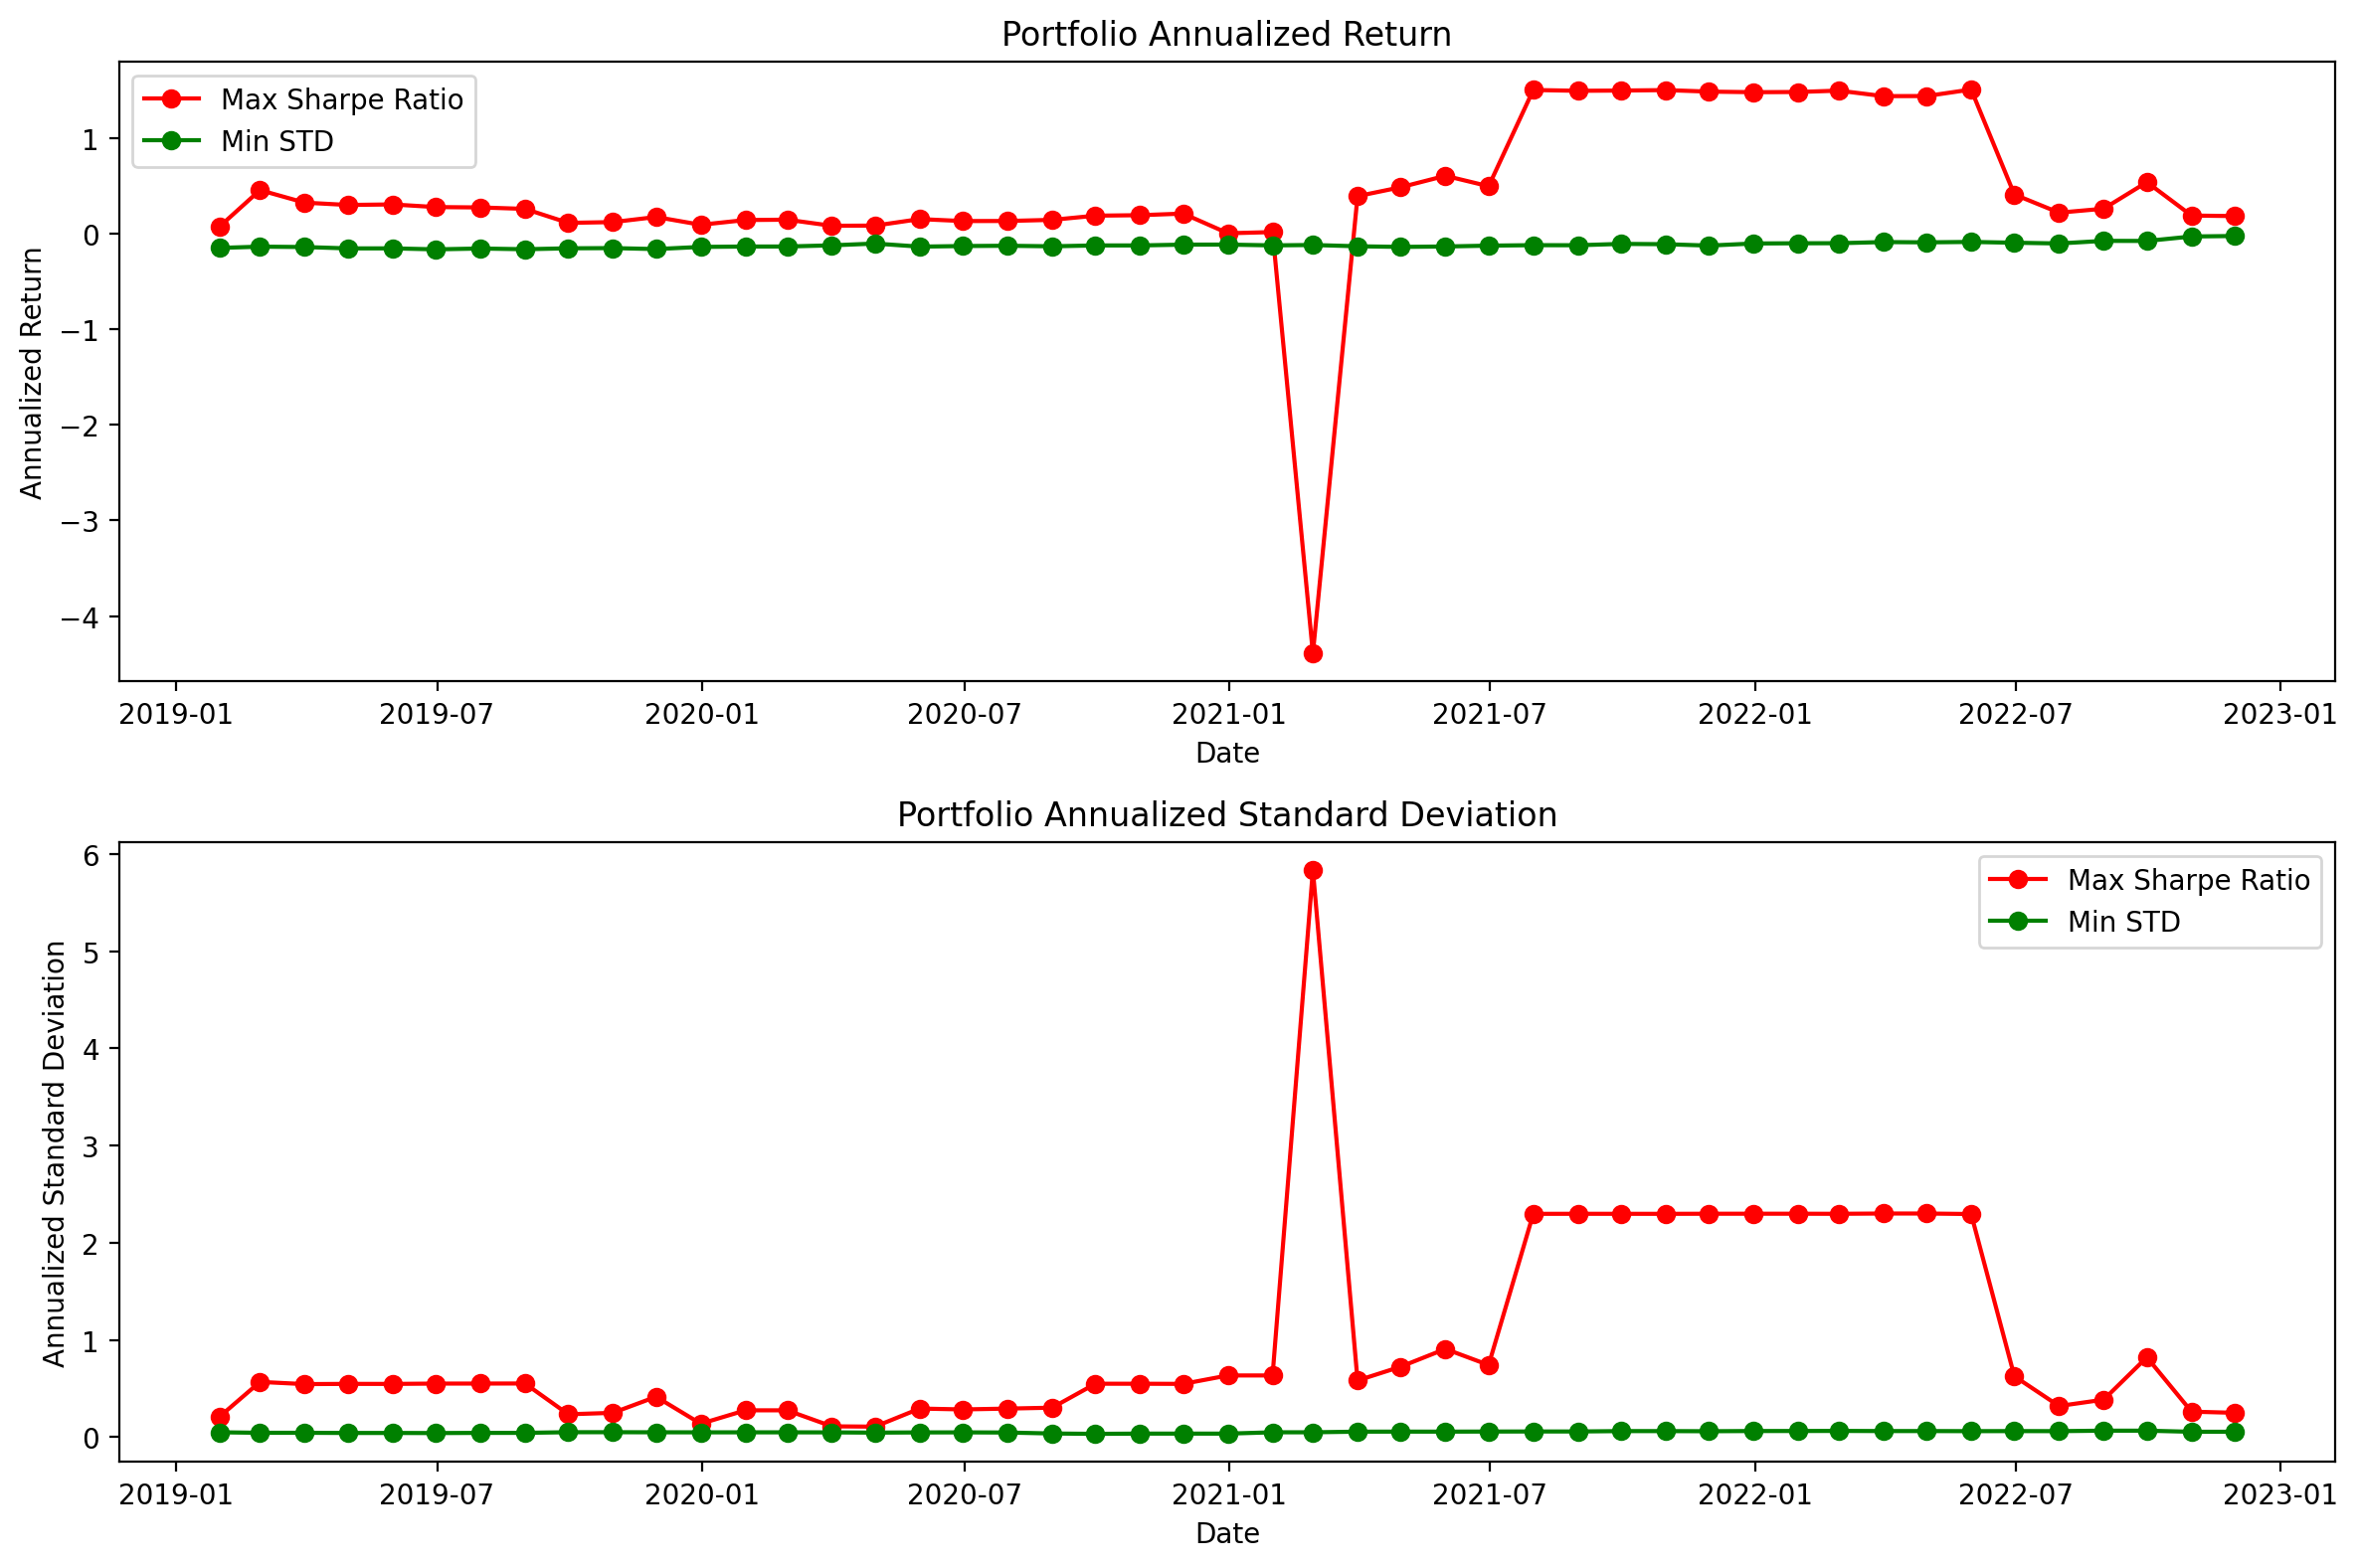

In [143]:
# Lists to store the data points
dates = [portfolio['date'] for portfolio in portfolios]
max_sharpe_rp = [portfolio['rp']/100 for portfolio in portfolios]
max_sharpe_sdp = [portfolio['sdp']/100 for portfolio in portfolios]
min_std_rp = [portfolio['rp_min']/100 for portfolio in portfolios]
min_std_sdp = [portfolio['sdp_min']/100 for portfolio in portfolios]

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(dates, max_sharpe_rp, marker='o', color='r', label='Max Sharpe Ratio')
plt.plot(dates, min_std_rp, marker='o', color='g', label='Min STD')
plt.title('Portfolio Annualized Return')
plt.xlabel('Date')
plt.ylabel('Annualized Return')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(dates, max_sharpe_sdp, marker='o', color='r', label='Max Sharpe Ratio')
plt.plot(dates, min_std_sdp, marker='o', color='g', label='Min STD')
plt.title('Portfolio Annualized Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Annualized Standard Deviation')
plt.legend()

plt.tight_layout()
plt.show()

In [144]:
mean_max_sharpe_rp = np.mean(max_sharpe_rp)
mean_max_sharpe_sdp = np.mean(max_sharpe_sdp)
mean_min_std_rp = np.mean(min_std_rp)
mean_min_std_sdp = np.mean(min_std_sdp)

print("Mean of Max Sharpe Ratio Annualized Return:", round(mean_max_sharpe_rp, 2))
print("Mean of Min STD Annualized Return:", round(mean_min_std_rp, 2),'\n')

print("Mean of Max Sharpe Ratio Annualized Standard Deviation:", round(mean_max_sharpe_sdp, 2))
print("Mean of Min STD Annualized Standard Deviation:", round(mean_min_std_sdp, 2))


Mean of Max Sharpe Ratio Annualized Return: 0.43
Mean of Min STD Annualized Return: -0.12 

Mean of Max Sharpe Ratio Annualized Standard Deviation: 0.99
Mean of Min STD Annualized Standard Deviation: 0.05


The strategies adjust to changing market conditions over time and reflect the idea used by some funds that adopt quantitative strategies.

Based on the performance metrics, you can assess which strategy performed better. Generally, a higher cumulative return, annualized return, and Sharpe ratio, combined with a lower standard deviation, indicate better performance. However, it's important to consider the specific goals, risk tolerance, and preferences of the investor when interpreting the results.

Remember that past performance is not indicative of future results, and it's crucial to conduct thorough analysis and consider multiple factors before making investment decisions.

The 2-year rolling window affects the results by considering a subset of data within a 2-year period for calculating the mean returns and covariance matrix. This rolling window approach allows the portfolio optimization to adapt to changing market conditions over time.

By using a rolling window, the optimization process takes into account the most recent 2 years of data and updates the portfolio allocations accordingly. This helps capture changes in the market dynamics and adjust the portfolio composition to optimize performance based on the updated information.

The effect of the rolling window is that the portfolio allocations may vary over time as the optimization process considers different subsets of data. This can lead to adjustments in the allocation weights for each asset in the portfolio, as the mean returns and covariance matrix change with each rolling window period.

The rolling window approach is useful for capturing short-term fluctuations in asset performance and adapting the portfolio to current market conditions. It provides a dynamic portfolio allocation strategy that can help optimize performance over time.